# Really looking forward for your suggestions in comment section... If you like my notebook, then give it a 'LIKE' 

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
# We will be reading train dataset to perform PCA.
# For reading datframe 'train' , we will be using pandas library and function 'read_csv' as our file is in csv format
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
print('data train is available')

In [ ]:
# shape of the data - this give us number of rows and columns in the dataframe
print('shape of the data is {} rows and {} columns'.format(train.shape[0],train.shape[1]))

In [ ]:
# we should take a look at complete dataset... so as our dataset have large number of rows and columns. we will be looking at only top 5 rows
# for looking only top 5 rows, we will be using train.head()
print(train.head())

We can see that first column of dataframe is label. and all other column are corresponding pixel values in 784 dimension/columns... we should investigate more about columns...

In [ ]:
# getting more info about dataframe..
print(train['label'].value_counts()) # value_counts give us count of different labels in particular column, here we use it on our 'label' column of train dataset
# it always better to see things in graphs and plot...
# for plot, we will be using seaborn package
import seaborn as sns
import matplotlib.pyplot as plt
label_count = train['label'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(label_count.index, label_count.values, alpha=0.8)
plt.title('Count of different labels')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Digits', fontsize=12)
plt.show()

As we can see from above plot, that our labels are fairly distributed... It is indeed nice thing...  

# What is PCA ? Why we bother about it ?

**Principal Component Analysis** (PCA) is an *unsupervised, non-parametric statistical technique* primarily used for dimensionality reduction in machine learning. Models also become more efficient as the reduced feature set *boosts learning rates and diminishes computation costs* by removing redundant features.

or in more simple words :

PCA is a method used to *reduce number of variables in your data by extracting important one from a large pool*. It reduces the dimension of your data with the aim of retaining as much information as possible.

# PCA for Data Visualization
# 
For a lot of machine learning applications it helps to be able to visualize your data. Visualizing 2 or 3 dimensional data is not that challenging. However, our MNIST dataset used in this part of the tutorial is 784 dimensional. You can use *PCA to reduce that 784 dimensional data into 2 or 3 dimensions so that you can plot and hopefully understand the data better*.

# PCA to Speed-up Machine Learning Algorithms

One of the most important applications of PCA is for speeding up machine learning algorithms. The MNIST database of handwritten digits is more suitable as it has 784 feature columns (784 dimensions), a training set of 60,000 examples, and a test set of 10,000 examples. PCA help us in reducing dimensionality of the dataset and help us in retaining most of the information availble in all features/dimension of the dataset

# So How to do principal component analysis on the dataset?

We are going to take step by step approach, which will give us insights in how PCA works... 

# *Using Sklearn.decomposition() for PCA is a shortcut, We will use it to do PCA in the end part of this tutorial. 

So have patience and have a nice ride through this tutorial...

So steps involved are as follows :

Step 2 : Prepare the dataset - It involves standardization of the dataset

Step 3 : Create Co-Variance Matrix of standardised data

Step 4 : (1) Find the top eigen values and corresponding eigen vectors...for projection in 2-D, find top two eigen value              and corresponding vector 
         (2) Multiplying transpose of matrix generated from step 4 with Co-variance matrix from step 2

Step 5 : Combine resultant matrix of step 4 with saved 

Step 6 : Plotting the resultant matrix which have two top features


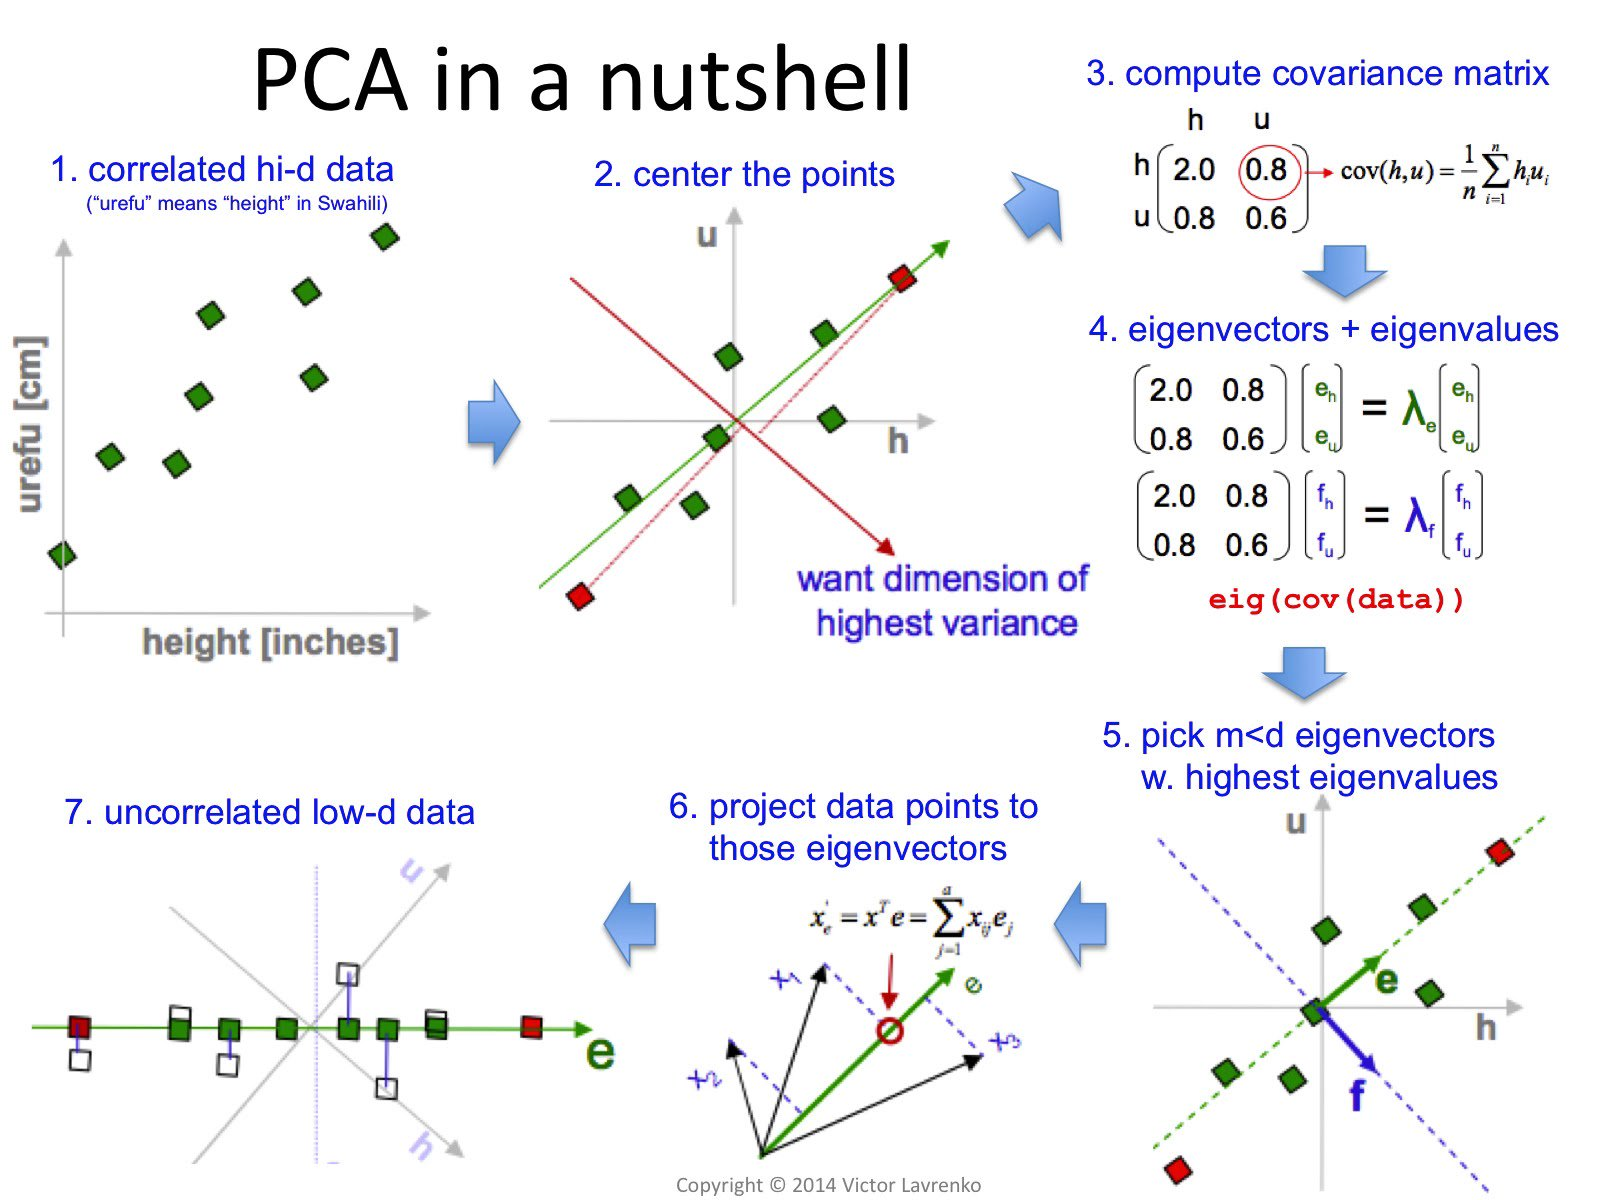

# Step 1 : Capture the Correlated data 

Already Done, MNIST data availbale

# Step 2 : Prepare the dataset****

In [ ]:
# 1. droping labels from the train dataset and but we need to save them to use later
label = train['label']
train.drop('label',axis=1,inplace=True)
print(train.shape) 

In [ ]:
# 2. We should standardize the datset 'train', we will use StandardScaler from sklearn.preprocessing 

from sklearn.preprocessing import StandardScaler # So what standardscaler do? Ans - Details given below
standardized_train =  StandardScaler().fit_transform(train)
print(standardized_train.shape)

# StandardScaler : 
It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data. Standardization is useful for data which has negative values. It arranges the data in a standard normal distribution.

# Step 3 : Co-variance Matrix of standarized data

In [ ]:
# Co-variance matrix of A is A*A^T i.e A is multiplied by transpose of A
sample_data = standardized_train

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T,sample_data) 

print('the shape of co-variance matrix is', covar_matrix.shape)

> # Step 4 : Findind top (2) eigen value and corresponding eigen vectors for projection in 2-D

In [ ]:
from scipy.linalg import eigh

# the parameter 'eighvals' is defined (low to high value)
# eigh function will return the eigen value in the ascending order
# this code will generate only top two (782,783) eigen value

values,vectors = eigh(covar_matrix,eigvals= (782,783))

print('shape of eigen vector', vectors.shape)

# coverting eigen vector into (2,d) shape

vectors = vectors.T

print('shape of updated eigen vector', vectors.shape)

# Step 4:   Multiplying transpose of matrix generated from step 4 with Co-variance matrix from step 2****

In [ ]:
# projecting the original data frame on the plane formed by two principal eigen vectors by vector-vector multiplication\

new_coordinates = np.matmul(vectors,sample_data.T)
print('resultant matrix by multiplication of matrix vector having shape of ',vectors.shape,' and co-variance matrix having shape ', sample_data.shape ,' is new_coordinates matrix having shape ',new_coordinates.shape )

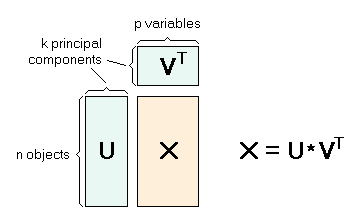

# Step 5 : Combine resultant matrix of step 4 with saved labels and transponsing it

In [ ]:
# appending labels to 2D projected data
new_coordinates = np.vstack((new_coordinates,label)).T

# creating the new dataframe for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates,columns = ('1stPrincipal','2ndPrincipal','label'))
print(dataframe.head())


# Step 6 : Ploting resultant dataframe containing projected points on axis (with highest and second highest eigen values)

In [ ]:
# Ploting the 2D data point with seaborn

sns.FacetGrid(dataframe, hue="label",height=6).map(plt.scatter,'1stPrincipal','2ndPrincipal').add_legend()
plt.show()

# PCA using Scikit-Learn

In [ ]:
# initailization of PCA
from sklearn import decomposition
pca = decomposition.PCA()

In [ ]:
# configuring the parameters
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_data will contain th 2-d projection of sample_data
print('shape of pca_data is ', pca_data.shape)

In [ ]:
# attaching the labels with pca_data

pca_data = np.vstack((pca_data.T,label)).T

# creating the new dataframe for ploting the labeled points.
dataframe2 = pd.DataFrame(data=pca_data,columns = ('1stPrincipal','2ndPrincipal','label'))


In [ ]:
# Ploting the 2D data point with seaborn

sns.FacetGrid(dataframe2, hue="label",height=6).map(plt.scatter,'1stPrincipal','2ndPrincipal').add_legend()
plt.show()

It may look different due to different color used for label from first plot and axis is also rotated